# Analise dos Microdados do Enem

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

## Pegando os nossos dados

In [ ]:
microdadosEnem = pd.read_csv("MICRODADOS_ENEM_2023.csv",sep=';', encoding='ISO-8859-1')

In [ ]:
colunasSelecionadas = ['NU_INSCRICAO', 'Q001', 'Q002', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']
microdadosEnemSelecionado = microdadosEnem.filter(items=colunasSelecionadas)
microdadosEnemSelecionado = microdadosEnemSelecionado.dropna()

### Troca de valores nas colunas de questões para facilitar o entendimento

In [ ]:
Q001_Q002_dict = {
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'
}

In [ ]:
microdadosEnemSelecionado['NO_Q001'] = [Q001_Q002_dict[resp] for resp in microdadosEnemSelecionado.Q001]
microdadosEnemSelecionado['NO_Q002'] = [Q001_Q002_dict[resp] for resp in microdadosEnemSelecionado.Q002]

### Comparando distribuição de nível de escolaridade dos pais dos candidatos no conjunto de dados

In [ ]:
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",809174
Não completou a 4ª série/5º ano do Ensino Fundamental,410065
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",331431
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",297233
"Completou a Faculdade, mas não completou a Pós-graduação",269803
Não sei,249611
Completou a Pós-graduação,214608
Nunca estudou,96339


In [ ]:
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",970947
Completou a Pós-graduação,362886
"Completou a Faculdade, mas não completou a Pós-graduação",359218
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",303957
Não completou a 4ª série/5º ano do Ensino Fundamental,280378
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",265666
Não sei,77441
Nunca estudou,57771


### Olhando o desempenho da nota de matemática segundo a escolaridade dos pais dos candidatos

In [ ]:
textdictQ001 = ''
for key, value in Q001_Q002_dict.items():
    textdictQ001 += f'{key} : {value}\n'

Text(0.02, 0.73, 'A : Nunca estudou\nB : Não completou a 4ª série/5º ano do Ensino Fundamental\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio\nE : Completou o Ensino Médio, mas não completou a Faculdade\nF : Completou a Faculdade, mas não completou a Pós-graduação\nG : Completou a Pós-graduação\nH : Não sei\n')

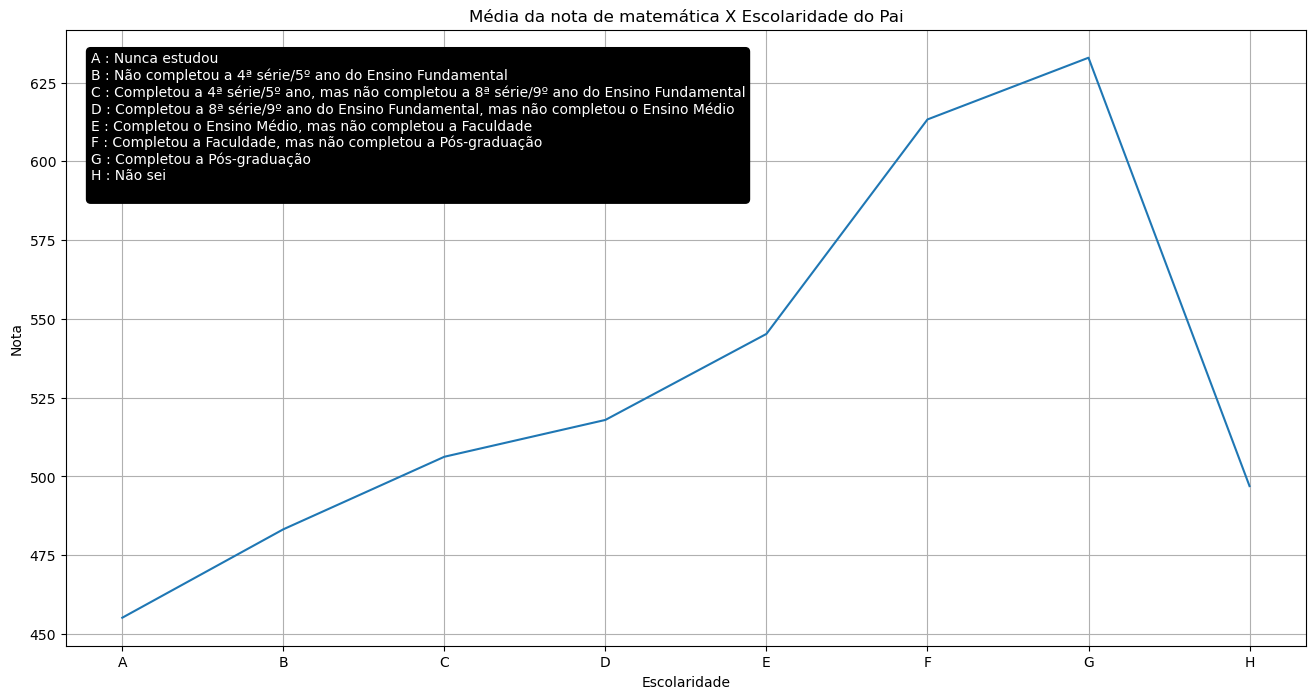

In [ ]:
matPai = microdadosEnemSelecionado.filter(items=['NU_NOTA_MT', 'Q001']).groupby('Q001').mean().plot(figsize=(16, 8), legend=False, grid=True)
matPai.set_title("Média da nota de matemática X Escolaridade do Pai")
matPai.set_xlabel("Escolaridade")
matPai.set_ylabel("Nota")
matPai.text(0.02, 0.73,textdictQ001, transform=matPai.transAxes, fontsize=10, color='white', bbox={'boxstyle': 'round', 'facecolor': 'black'})

Text(0.02, 0.73, 'A : Nunca estudou\nB : Não completou a 4ª série/5º ano do Ensino Fundamental\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio\nE : Completou o Ensino Médio, mas não completou a Faculdade\nF : Completou a Faculdade, mas não completou a Pós-graduação\nG : Completou a Pós-graduação\nH : Não sei\n')

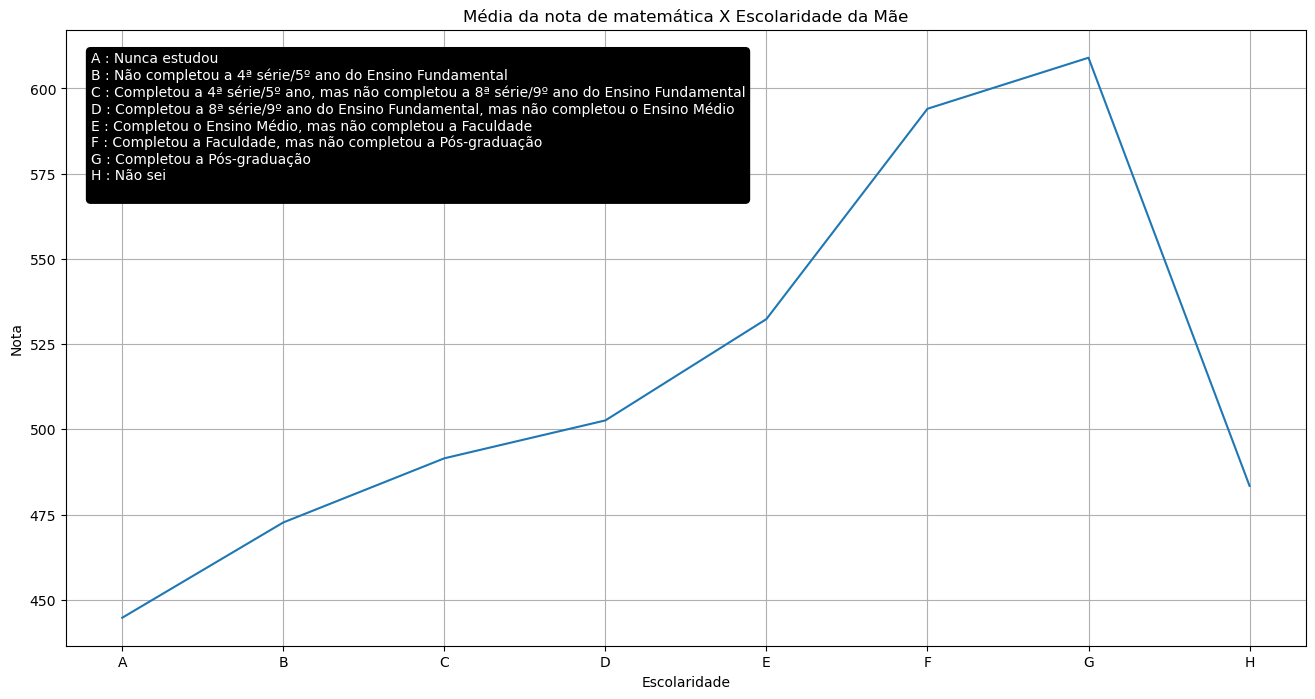

In [ ]:
matMae = microdadosEnemSelecionado.filter(items=['NU_NOTA_MT', 'Q002']).groupby('Q002').mean().plot(figsize=(16, 8), legend=False, grid= True)
matMae.set_title("Média da nota de matemática X Escolaridade da Mãe")
matMae.set_xlabel("Escolaridade")
matMae.set_ylabel("Nota")

matMae.text(0.02, 0.73,textdictQ001, transform=matMae.transAxes, fontsize=10, color='white', bbox={'boxstyle': 'round', 'facecolor': 'black'})

### Olhando o desempenho da nota da redação segundo a escolaridade dos pais dos candidatos

Text(0.02, 0.73, 'A : Nunca estudou\nB : Não completou a 4ª série/5º ano do Ensino Fundamental\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio\nE : Completou o Ensino Médio, mas não completou a Faculdade\nF : Completou a Faculdade, mas não completou a Pós-graduação\nG : Completou a Pós-graduação\nH : Não sei\n')

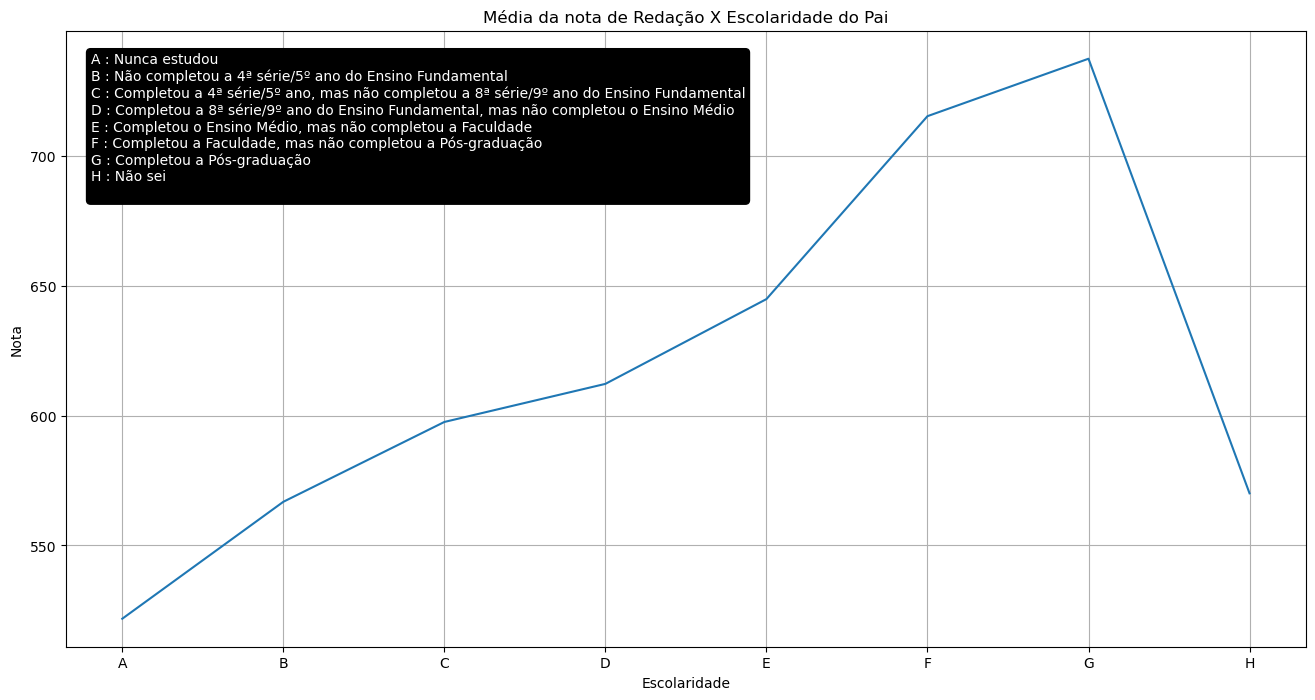

In [ ]:
redPai = microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO', 'Q001']).groupby('Q001').mean().plot(figsize=(16, 8), legend=False, grid=True)
redPai.set_title("Média da nota de Redação X Escolaridade do Pai")
redPai.set_xlabel("Escolaridade")
redPai.set_ylabel("Nota")

redPai.text(0.02, 0.73,textdictQ001, transform=redPai.transAxes, fontsize=10, color='white', bbox={'boxstyle': 'round', 'facecolor': 'black'})

Text(0.02, 0.73, 'A : Nunca estudou\nB : Não completou a 4ª série/5º ano do Ensino Fundamental\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio\nE : Completou o Ensino Médio, mas não completou a Faculdade\nF : Completou a Faculdade, mas não completou a Pós-graduação\nG : Completou a Pós-graduação\nH : Não sei\n')

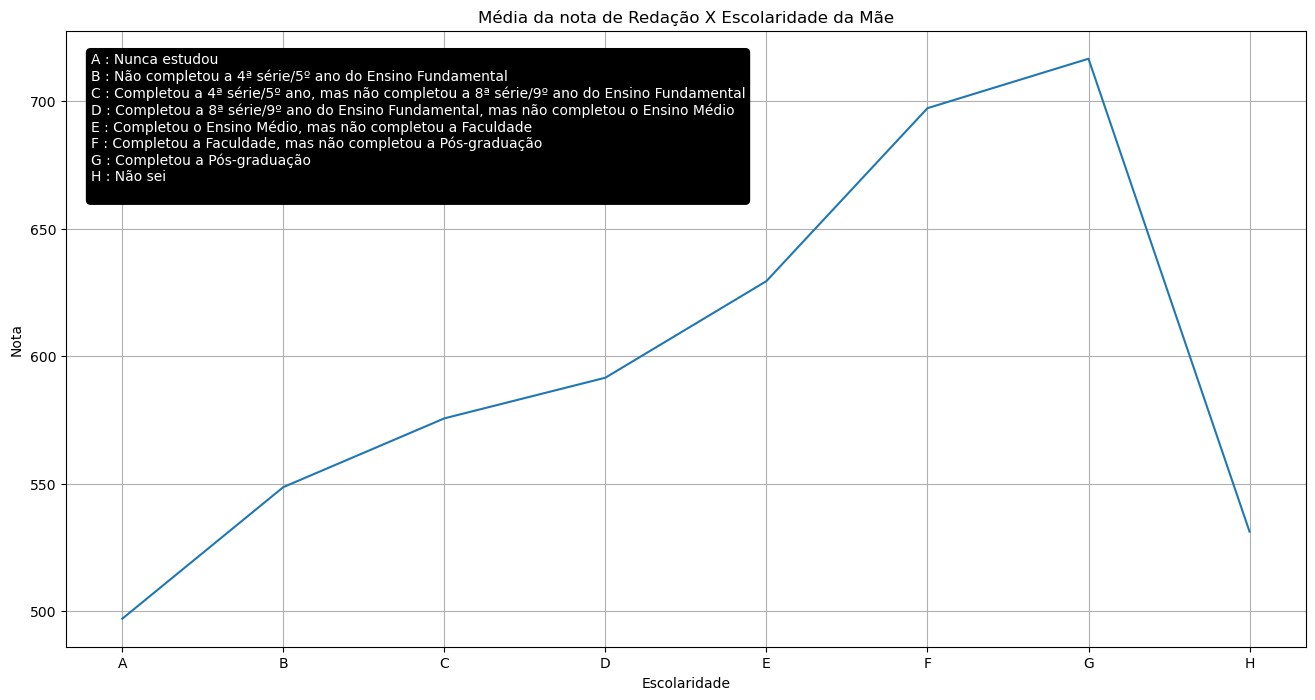

In [ ]:
redMae = microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO', 'Q002']).groupby('Q002').mean().plot(figsize=(16, 8), legend=False, grid=True)
redMae.set_title("Média da nota de Redação X Escolaridade da Mãe")
redMae.set_xlabel("Escolaridade")
redMae.set_ylabel("Nota")

redMae.text(0.02, 0.73,textdictQ001, transform=redMae.transAxes, fontsize=10, color='white', bbox={'boxstyle': 'round', 'facecolor': 'black'})

### Conferindo se a mesma lógica se aplica quando tratamos de região para região

In [ ]:
colunasSelecionadasRegiao = ['NU_INSCRICAO', 'SG_UF_PROVA', 'Q001', 'Q002', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']
microdadosEnemRegiao = microdadosEnem.filter(items=colunasSelecionadasRegiao)
microdadosEnemRegiao = microdadosEnemRegiao.dropna()

In [ ]:
microdadosEnemRegiao['NO_Q001'] = [Q001_Q002_dict[resp] for resp in microdadosEnemRegiao.Q001]
microdadosEnemRegiao['NO_Q002'] = [Q001_Q002_dict[resp] for resp in microdadosEnemRegiao.Q002]
microdadosEnemRegiao

,NU_INSCRICAO,SG_UF_PROVA,Q001,Q002,NU_NOTA_REDACAO,NU_NOTA_MT,NO_Q001,NO_Q002
2,210061103945,RS,H,E,700.0,363.2,Não sei,"Completou o Ensino Médio, mas não completou a ..."
3,210060214087,CE,D,D,880.0,466.7,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
4,210059980948,CE,B,B,560.0,338.3,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
9,210060801601,SP,H,E,600.0,680.2,Não sei,"Completou o Ensino Médio, mas não completou a ..."
10,210059085130,RN,F,C,860.0,736.3,"Completou a Faculdade, mas não completou a Pós...","Completou a 4ª série/5º ano, mas não completou..."
...,...,...,...,...,...,...,...,...
3933946,210061965964,RS,B,B,500.0,496.8,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
3933948,210061959674,RS,E,E,600.0,530.5,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
3933950,210061959676,RS,C,E,540.0,547.3,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ..."
3933951,210061950911,SP,F,F,640.0,644.4,"Completou a Faculdade, mas não completou a Pós...","Completou a Faculdade, mas não completou a Pós..."


### Nota da Redação dos candidatos X Escolaridade dos pais X Estado

Text(0.02, 0.73, 'A : Nunca estudou\nB : Não completou a 4ª série/5º ano do Ensino Fundamental\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio\nE : Completou o Ensino Médio, mas não completou a Faculdade\nF : Completou a Faculdade, mas não completou a Pós-graduação\nG : Completou a Pós-graduação\nH : Não sei\n')

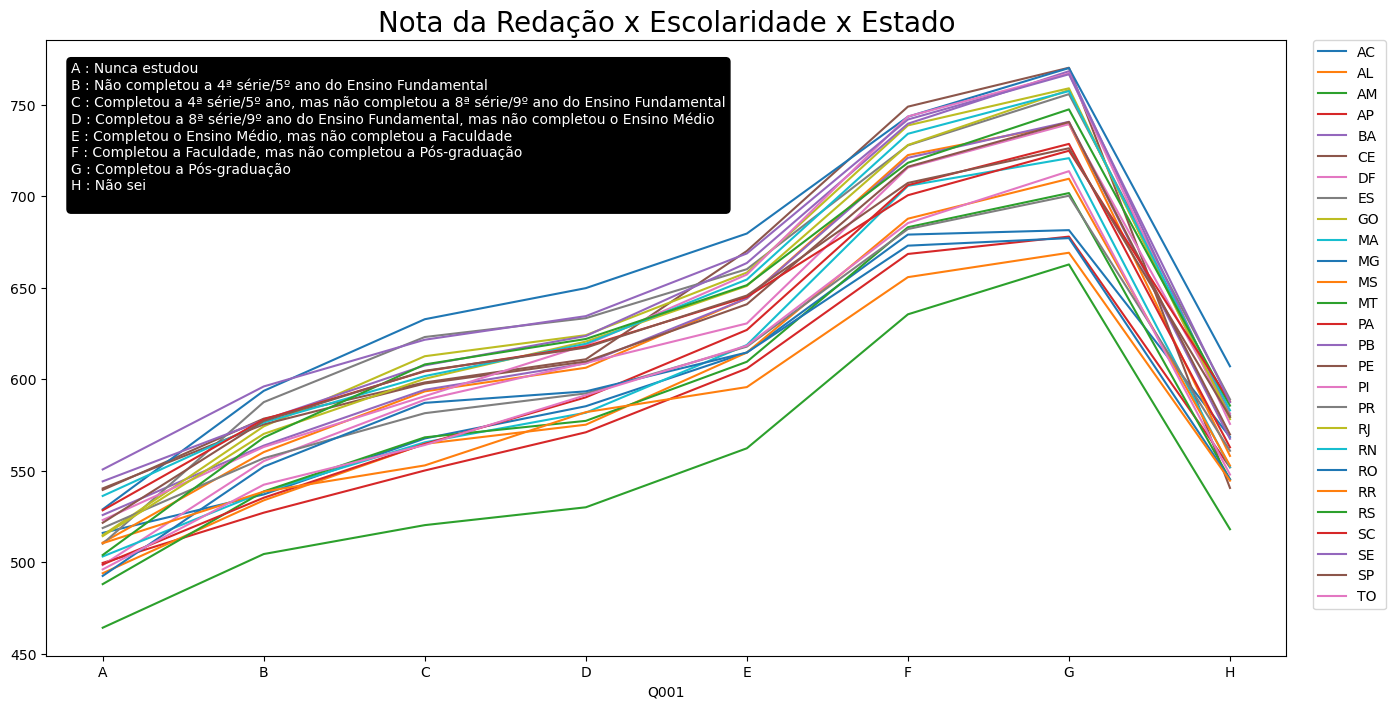

In [ ]:
axes = microdadosEnemRegiao.filter(items=['NU_NOTA_REDACAO', 'Q001', 'SG_UF_PROVA'])\
        .groupby(['Q001', 'SG_UF_PROVA'])\
        .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
        .unstack().plot(figsize=(16,8))

axes.set_title("Nota da Redação x Escolaridade x Estado", size = 20)

handles, labels = axes.get_legend_handles_labels()

editedLabels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
axes.legend(editedLabels, bbox_to_anchor=(1.08, 1), loc=0, borderaxespad=0.)

axes.text(0.02, 0.73,textdictQ001, transform=axes.transAxes, fontsize=10, color='white', bbox={'boxstyle': 'round', 'facecolor': 'black'})